This Jupyter notebook conducts quality testing of CTGAN synthetic data generation by loading 36 pre-trained models for different service codes descriotions and generating large-scale synthetic dataset.

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sdv.single_table import CTGANSynthesizer
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
from pathlib import Path
from sdv.single_table import CTGANSynthesizer

def unsanitize_filename(name: str) -> str:
    """Reverse the filename sanitization (replace underscores with slashes where needed)."""
    # If underscores are legitimate spaces, only replace those that were originally slashes.
    # Given your naming pattern, just replace the first underscore with a slash if applicable.
    # If more complex, you'll need a mapping file.
    return name.replace("_", "/")

models_dir = Path("checkpoints_4/models")
model_files = list(models_dir.glob("*.pkl"))

print(f"Found {len(model_files)} model files:")
models = {}
service_codes = []

for model_file in model_files:
    # Remove "_final.pkl"
    stem = model_file.stem.replace("_final", "")
    
    # Reverse the earlier sanitization (turn _ back into / in the right places)
    # In your case, original `/` was replaced with `_`
    service_code = stem.replace("_", "/")
    
    print(f"Loading model for: {service_code}")
    model = CTGANSynthesizer.load(str(model_file))
    models[service_code] = model
    service_codes.append(service_code)
    print("✓ Model loaded successfully")

print(f"\n✓ All {len(models)} models loaded successfully!")
print(f"Service codes: {service_codes}")

Found 36 model files:
Loading model for: ASSIST MEMBER OF THE PUBLIC
✓ Model loaded successfully
Loading model for: FALSE CALL
✓ Model loaded successfully
Loading model for: DRUGS/SUBSTANCE MISUSE
✓ Model loaded successfully
Loading model for: TASK INCIDENT
✓ Model loaded successfully
Loading model for: ROAD TRAFFIC OFFENCE
✓ Model loaded successfully
Loading model for: VEHICLE CRIME
✓ Model loaded successfully
Loading model for: PUBLIC NUISANCE
✓ Model loaded successfully
Loading model for: OTHER
✓ Model loaded successfully
Loading model for: ANIMALS
✓ Model loaded successfully
Loading model for: ABANDONED/SILENT 999 CALL
✓ Model loaded successfully
Loading model for: DAMAGE
✓ Model loaded successfully
Loading model for: SUDDEN DEATH
✓ Model loaded successfully
Loading model for: ROAD TRAFFIC MATTER
✓ Model loaded successfully
Loading model for: HOUSEBREAKING
✓ Model loaded successfully
Loading model for: ABANDONED VEHICLES
✓ Model loaded successfully
Loading model for: THEFT
✓ Model 

In [5]:
import pandas as pd

pd.options.display.max_rows = 4000

# Load your filtered dataset from pickle
DATA_PATH = "filtered_data/df_v2_filtered.pkl"

df = pd.read_pickle(DATA_PATH)

import pandas as pd

# Example: assume df is your full incidents DataFrame
cutoff = 5000

# Identify categories below the cutoff
counts = df['service_code_description'].value_counts()
low_categories = counts[counts < cutoff].index

# Replace low-frequency categories with "OTHER"
df['service_code_description'] = df['service_code_description'].replace(low_categories, 'OTHER')

service_code_counts = df["service_code_description"].value_counts()
service_code_counts

service_code_description
ASSIST MEMBER OF THE PUBLIC    169406
CONCERN FOR PERSON             121876
DISTURBANCE                     90395
THEFT                           87517
DOMESTIC INCIDENT               79291
ROAD TRAFFIC MATTER             75033
PUBLIC NUISANCE                 59037
ROAD TRAFFIC COLLISION          58259
OTHER                           44717
ABANDONED/SILENT 999 CALL       41102
EXTERNAL AGENCY REQUEST         40557
ASSAULT                         39608
NOISE                           36849
DAMAGE                          33240
NEIGHBOUR DISPUTE               30507
FALSE CALL                      30413
COMMUNICATIONS                  29706
MISSING PERSON/ABSCONDER        27140
SUSPECT PERSONS                 25141
POLICE INFORMATION              20941
FRAUD INCIDENT                  20360
ROAD TRAFFIC OFFENCE            18563
CHILD PROTECTION                17091
DRUGS/SUBSTANCE MISUSE          16948
VEHICLE CRIME                   15139
DOMESTIC BAIL CHECK      

In [6]:
# Generating slice synthetic data
synthetic_slices = []

# Generating slice synthetic data
for service, count in service_code_counts.items():
    # derive model key from the service description
    model = models.get(service)
    if model is None:
        print(f"Warning: no model for '{service}' (key='{key}'), skipping.")
        continue

    # sample exactly `count` rows
    print(f"Generating {count} samples for '{service}'...")
    slice_df = model.sample(count)

    # tag the synthetic rows with their service code
    slice_df["service_code_description"] = service

    # collect for later concatenation
    synthetic_slices.append(slice_df)

Generating 169406 samples for 'ASSIST MEMBER OF THE PUBLIC'...
Generating 121876 samples for 'CONCERN FOR PERSON'...
Generating 90395 samples for 'DISTURBANCE'...
Generating 87517 samples for 'THEFT'...
Generating 79291 samples for 'DOMESTIC INCIDENT'...
Generating 75033 samples for 'ROAD TRAFFIC MATTER'...
Generating 59037 samples for 'PUBLIC NUISANCE'...
Generating 58259 samples for 'ROAD TRAFFIC COLLISION'...
Generating 44717 samples for 'OTHER'...
Generating 41102 samples for 'ABANDONED/SILENT 999 CALL'...
Generating 40557 samples for 'EXTERNAL AGENCY REQUEST'...
Generating 39608 samples for 'ASSAULT'...
Generating 36849 samples for 'NOISE'...
Generating 33240 samples for 'DAMAGE'...
Generating 30507 samples for 'NEIGHBOUR DISPUTE'...
Generating 30413 samples for 'FALSE CALL'...
Generating 29706 samples for 'COMMUNICATIONS'...
Generating 27140 samples for 'MISSING PERSON/ABSCONDER'...
Generating 25141 samples for 'SUSPECT PERSONS'...
Generating 20941 samples for 'POLICE INFORMATION

In [7]:
synthetic_data = pd.concat(synthetic_slices, ignore_index=True)

## TSNE

Applying t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2680694 samples in 3.836s...
[t-SNE] Computed neighbors for 2680694 samples in 485.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2680694
[t-SNE] Computed conditional probabilities for sample 2000 / 2680694
[t-SNE] Computed conditional probabilities for sample 3000 / 2680694
[t-SNE] Computed conditional probabilities for sample 4000 / 2680694
[t-SNE] Computed conditional probabilities for sample 5000 / 2680694
[t-SNE] Computed conditional probabilities for sample 6000 / 2680694
[t-SNE] Computed conditional probabilities for sample 7000 / 2680694
[t-SNE] Computed conditional probabilities for sample 8000 / 2680694
[t-SNE] Computed conditional probabilities for sample 9000 / 2680694
[t-SNE] Computed conditional probabilities for sample 10000 / 2680694
[t-SNE] Computed conditional probabilities for sample 11000 / 2680694
[t-SNE] Computed conditional probabilities for sample 12000 / 2680694
[t

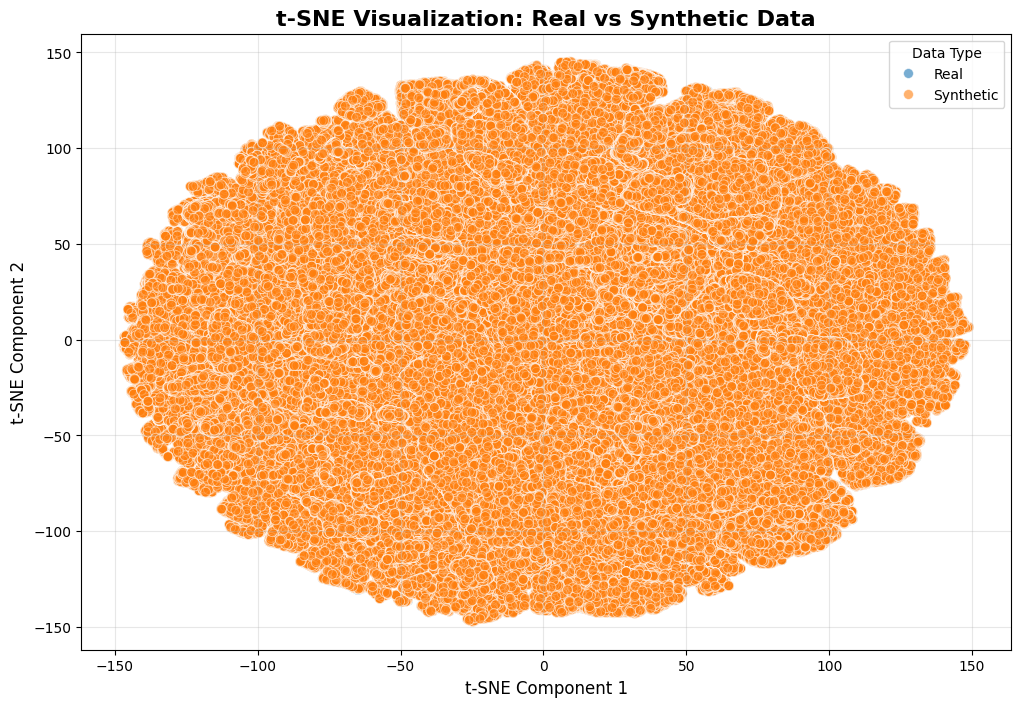

Real data points: 1340347
Synthetic data points: 1340347


In [16]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess real data
df_real_processed = df.copy()

# Handle categorical columns
categorical_cols = ['max_final_priority', 'inc_resourced', 'scrs_crime_inc', 
                   'service_code_description', 'multi_member_ward']

for col in categorical_cols:
    if col in df_real_processed.columns:
        le = LabelEncoder()
        df_real_processed[col] = df_real_processed[col].fillna('Unknown')
        df_real_processed[col] = le.fit_transform(df_real_processed[col].astype(str))

# Handle numerical columns
numerical_cols = ['hour_created', 'date_seq']
for col in numerical_cols:
    if col in df_real_processed.columns:
        df_real_processed[col] = pd.to_numeric(df_real_processed[col], errors='coerce')
        df_real_processed[col] = df_real_processed[col].fillna(df_real_processed[col].median())

# Preprocess synthetic data
synthetic_processed = synthetic_data.copy()

for col in categorical_cols:
    if col in synthetic_processed.columns:
        le = LabelEncoder()
        synthetic_processed[col] = synthetic_processed[col].fillna('Unknown')
        synthetic_processed[col] = le.fit_transform(synthetic_processed[col].astype(str))

for col in numerical_cols:
    if col in synthetic_processed.columns:
        synthetic_processed[col] = pd.to_numeric(synthetic_processed[col], errors='coerce')
        synthetic_processed[col] = synthetic_processed[col].fillna(synthetic_processed[col].median())

# Get common columns
common_cols = list(set(df_real_processed.columns) & set(synthetic_processed.columns))
df_real_processed = df_real_processed[common_cols]
synthetic_processed = synthetic_processed[common_cols]

# Combine datasets
combined_data = pd.concat([df_real_processed, synthetic_processed], ignore_index=True)
labels = ['Real'] * len(df_real_processed) + ['Synthetic'] * len(synthetic_processed)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

# Apply t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, verbose=1)
tsne_results = tsne.fit_transform(scaled_data)

# Plot results
plt.figure(figsize=(12, 8))

tsne_df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'type': labels
})

sns.scatterplot(data=tsne_df, x='x', y='y', hue='type', alpha=0.6, s=50)
plt.title('t-SNE Visualization: Real vs Synthetic Data', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Data Type')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Real data points: {len(df_real_processed)}")
print(f"Synthetic data points: {len(synthetic_processed)}")

In [1]:
# Plot results
plt.figure(figsize=(12, 8))

tsne_df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'type': labels
})

sns.scatterplot(data=tsne_df, x='x', y='y', hue='type', alpha=0.9, s=10)
plt.title('t-SNE Visualization: Real vs Synthetic Data', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
# plt.legend(title='Data Type')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Real data points: {len(df_real_processed)}")
print(f"Synthetic data points: {len(synthetic_processed)}")

NameError: name 'plt' is not defined

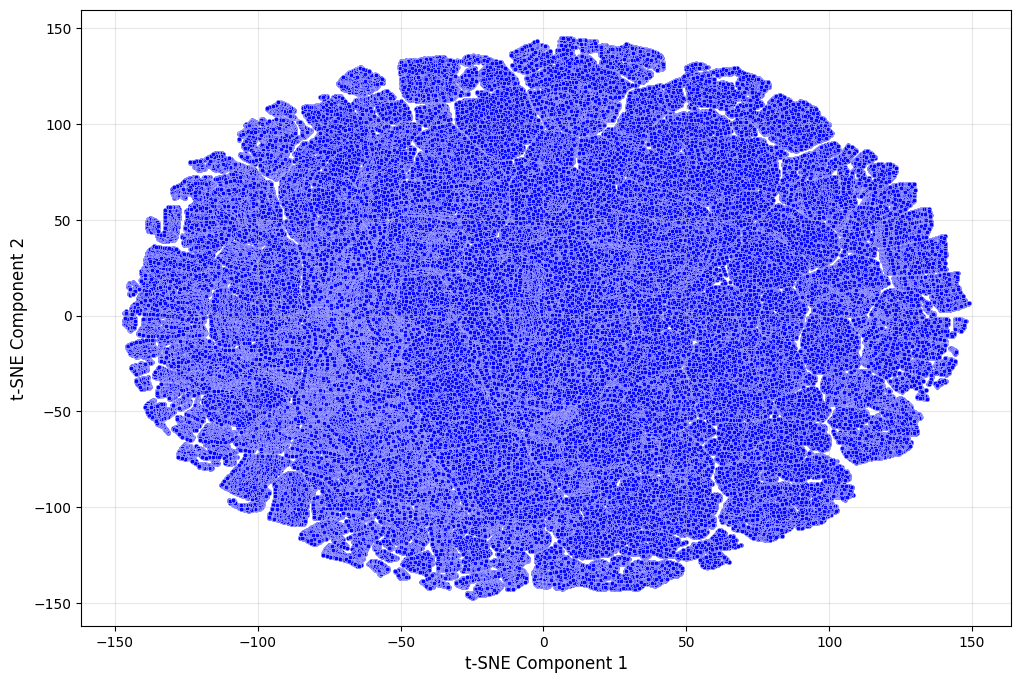

Real data points: 1340347


In [32]:
# Plot results - Real Data Only
plt.figure(figsize=(12, 8))

# Create dataframe with all data
tsne_df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'type': labels
})

# Filter to show only real data
real_mask = (tsne_df['type'] == 'Real')
tsne_real = tsne_df[real_mask]

# Plot only real data
sns.scatterplot(data=tsne_real, x='x', y='y', alpha=0.9, s=10, color='blue')
# plt.title('t-SNE Visualization: Real Data Only', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Real data points: {len(tsne_real)}")

## Correlation

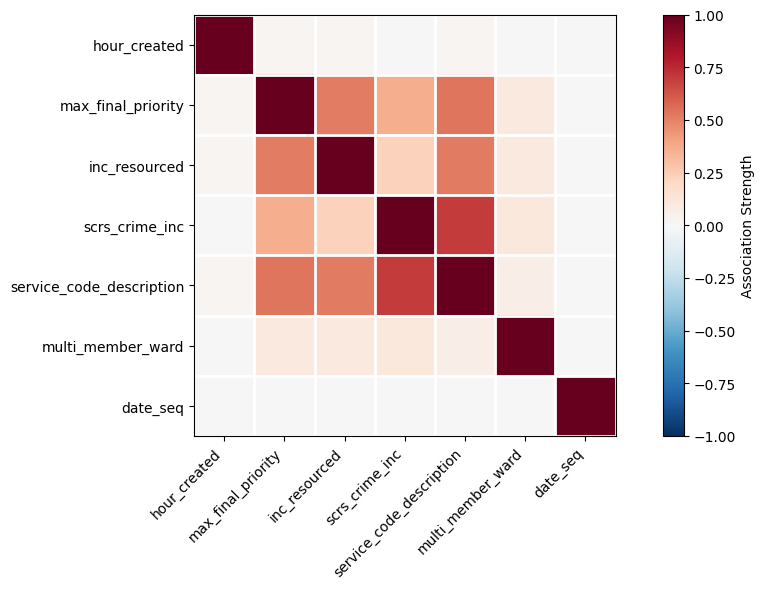

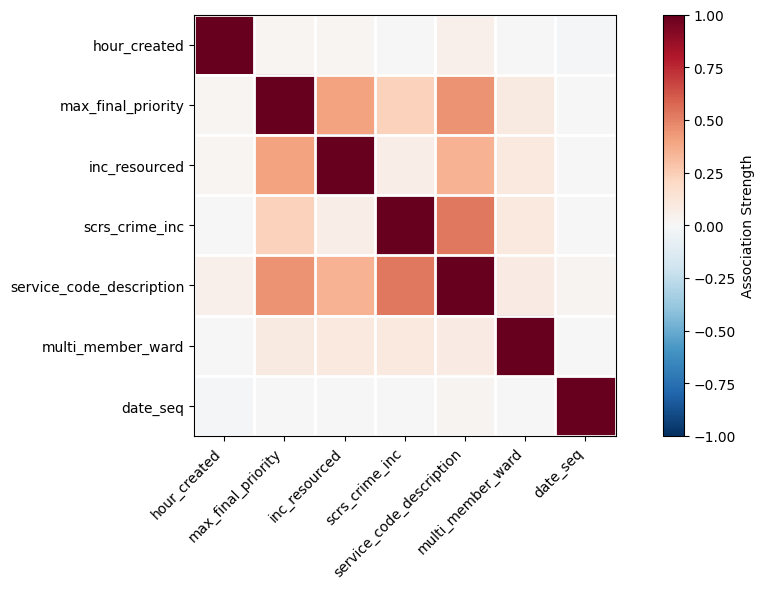

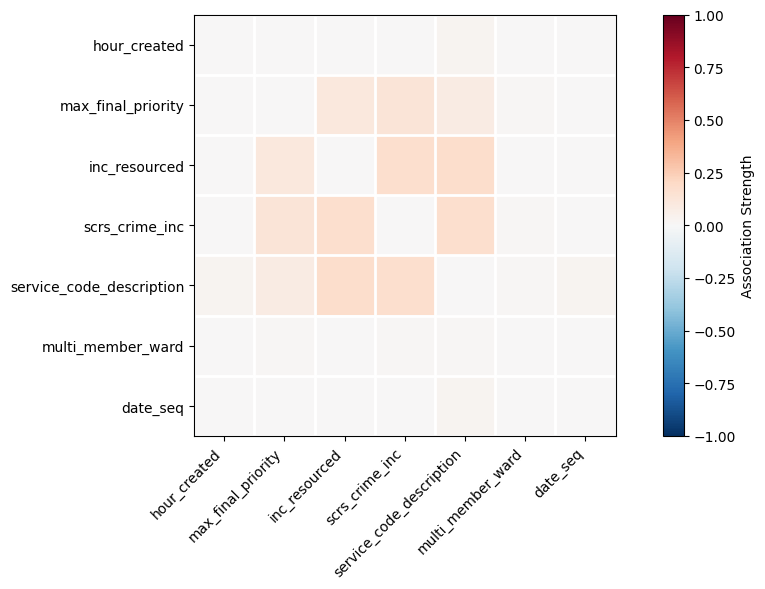

In [9]:
import itertools
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, pointbiserialr, chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt

def _is_binary(s):
    if pd.api.types.is_bool_dtype(s):
        return True
    if pd.api.types.is_numeric_dtype(s):
        u = s.dropna().unique()
        return len(u) <= 2 and set(u).issubset({0, 1})
    return False

def _var_type(s):
    if _is_binary(s):
        return "binary"
    if pd.api.types.is_numeric_dtype(s):
        return "continuous"
    return "categorical"

def _cramers_v(a, b):
    tbl = pd.crosstab(a, b)
    chi2 = chi2_contingency(tbl, correction=False)[0]
    n = tbl.values.sum()
    k, r = tbl.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

def _mutual_info_cat_cont(cat, cont, n_bins=10, strategy="quantile"):
    mask = cat.notna() & cont.notna()
    if mask.sum() == 0:
        return np.nan
    cat_codes = pd.Categorical(cat[mask]).codes
    cont_binned = (
        KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
        .fit_transform(cont[mask].to_numpy().reshape(-1, 1))
        .astype(int)
        .ravel()
    )
    return normalized_mutual_info_score(cat_codes, cont_binned, average_method="min")

def _association(x, y, xtype, ytype):
    if xtype == ytype == "continuous":
        return pearsonr(x, y)[0]
    if {"binary", "continuous"} <= {xtype, ytype} and "categorical" not in {xtype, ytype}:
        return pointbiserialr(x, y)[0]
    if xtype == ytype == "binary":
        return pearsonr(x, y)[0]
    if {"categorical", "binary"} <= {xtype, ytype}:
        return _cramers_v(x, y)
    if xtype == ytype == "categorical":
        return _cramers_v(x, y)
    if {"categorical", "continuous"} <= {xtype, ytype}:
        cat, cont = (x, y) if xtype == "categorical" else (y, x)
        return _mutual_info_cat_cont(cat, cont)
    raise NotImplementedError(f"No association for {xtype} × {ytype}")

def association_matrix(df):
    cols = df.columns.tolist()
    types = {c: _var_type(df[c]) for c in cols}
    matrix = pd.DataFrame(np.nan, index=cols, columns=cols)
    
    for a, b in itertools.combinations(cols, 2):
        at, bt = types[a], types[b]
        try:
            assoc = _association(df[a].dropna(), df[b].dropna(), at, bt)
            matrix.loc[a, b] = assoc
            matrix.loc[b, a] = assoc
        except:
            matrix.loc[a, b] = np.nan
            matrix.loc[b, a] = np.nan
    
    np.fill_diagonal(matrix.values, 1.0)
    return matrix

def plot_heatmap(matrix, title, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(matrix.values, cmap='RdBu_r', vmin=-1, vmax=1, interpolation='none')
    
    ax.set_xticks(np.arange(matrix.shape[1]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticklabels(matrix.columns, rotation=45, ha='right')
    ax.set_yticklabels(matrix.index)
    
    ax.set_xticks(np.arange(-.5, matrix.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, matrix.shape[0], 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', length=0)
    
    plt.colorbar(im, ax=ax, label="Association Strength")
    # plt.title(title)
    plt.tight_layout()
    plt.show()

# Calculate association matrices
real_associations = association_matrix(df)
synthetic_associations = association_matrix(synthetic_data)

# Plot both heatmaps
plot_heatmap(real_associations, "Real Data - Association Matrix", figsize=(10, 6))
plot_heatmap(synthetic_associations, "Synthetic Data - Association Matrix", figsize=(10, 6))

# Plot difference matrix
diff_matrix = np.abs(real_associations - synthetic_associations)
plot_heatmap(diff_matrix, "Absolute Difference in Associations\n(Real vs Synthetic)", figsize=(10, 6))